# Decision Tree Classification

## Importing the libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype 

## Importing the dataset

In [52]:
data = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [53]:
data.shape

(5110, 12)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Checking for NaN values

In [55]:
round(data.isna().sum()/len(data)*100,2)

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64

There are some NaN values in BMI column. Since the number of those is small we can safely drop them

In [56]:
data.dropna(inplace = True)

In [57]:
round(data.isna().sum()/len(data)*100,2)

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

We do not need Id column

In [58]:
data.drop(["id"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


## Checking what portion of patients had stroke

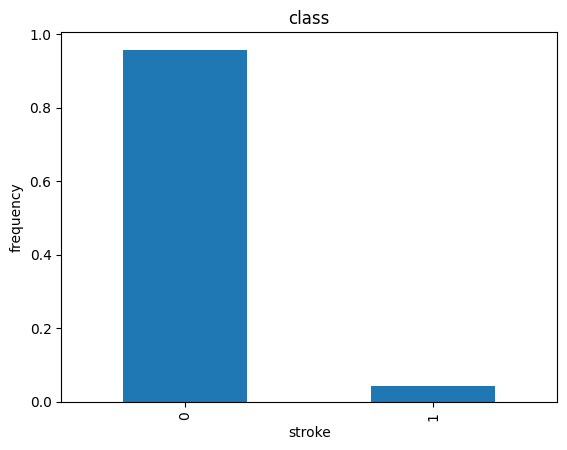

In [106]:
data["stroke"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="stroke",
    ylabel="frequency",
    title="class"

);

## Checking overall distribution

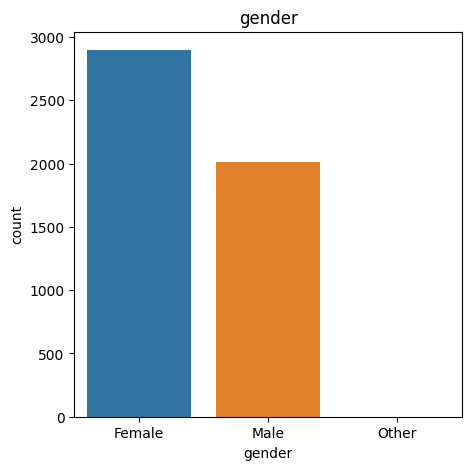

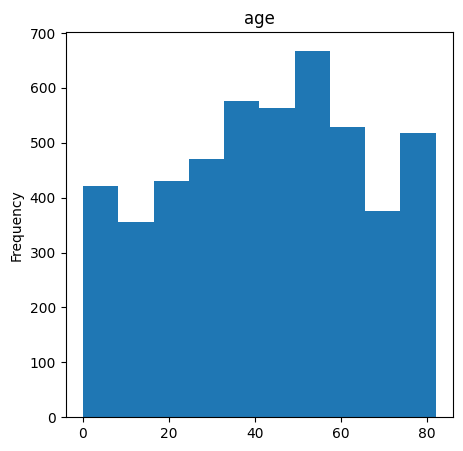

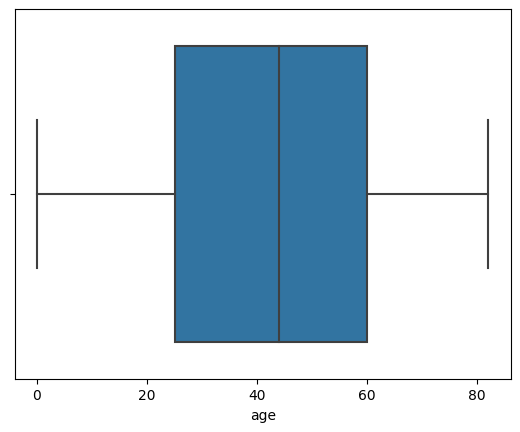

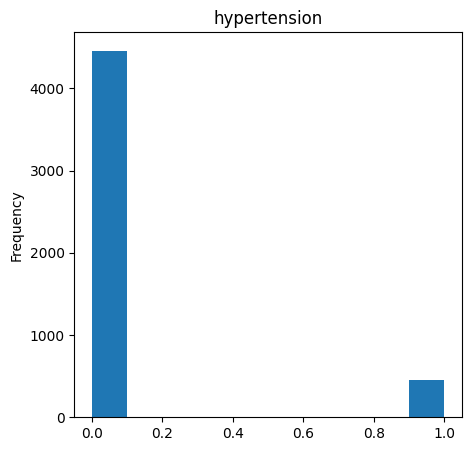

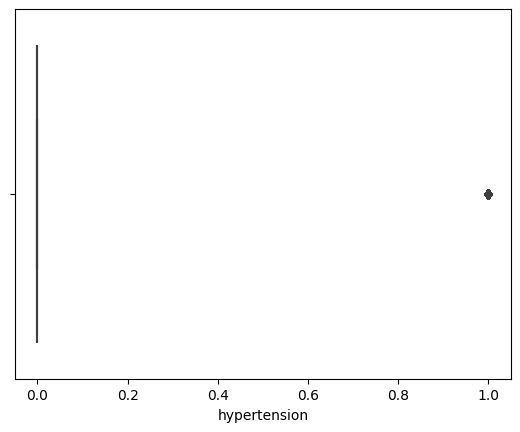

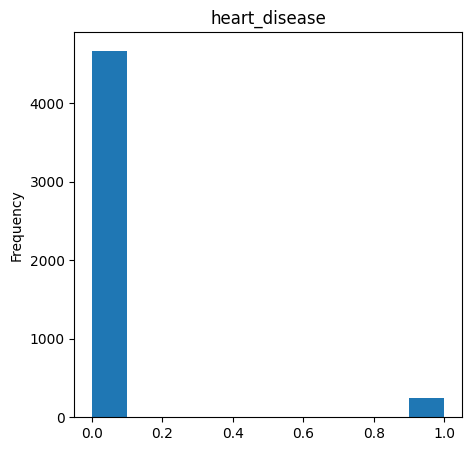

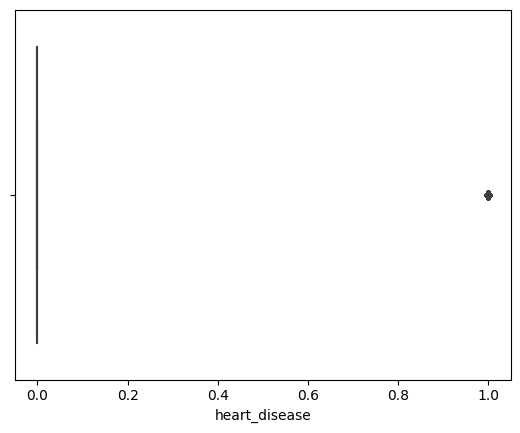

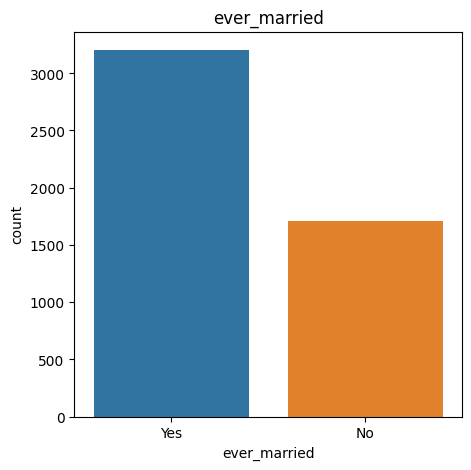

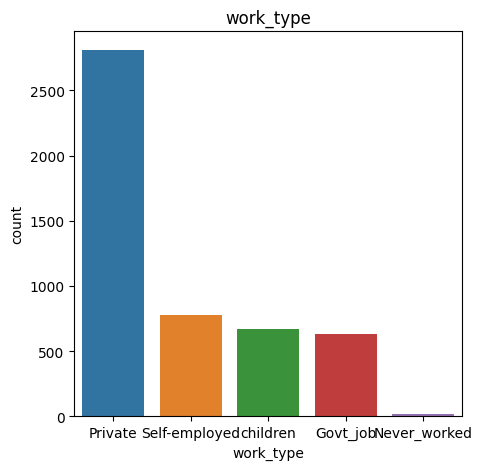

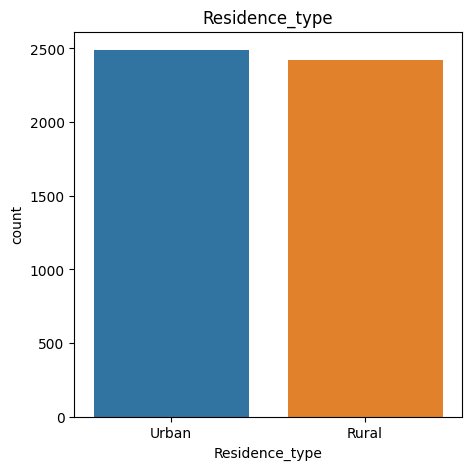

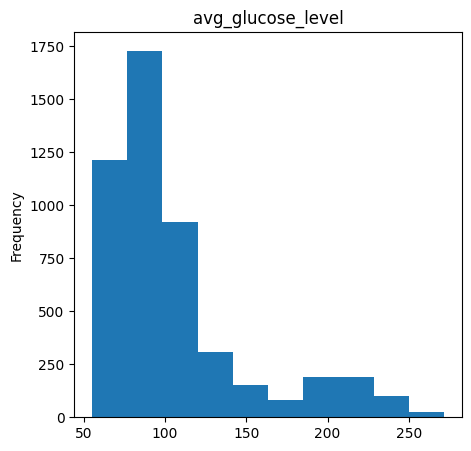

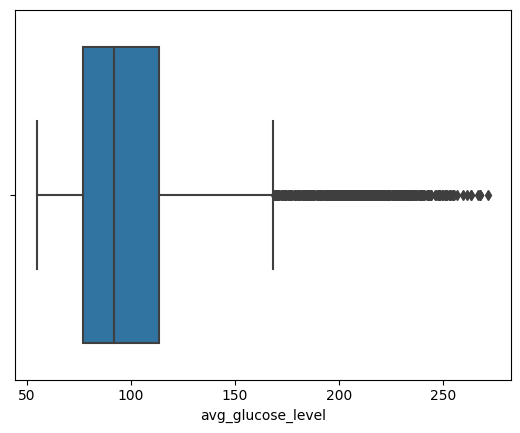

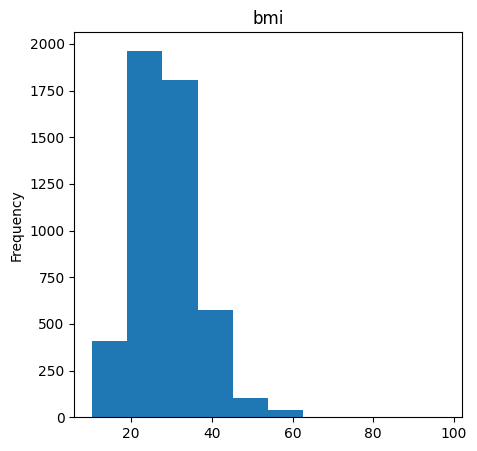

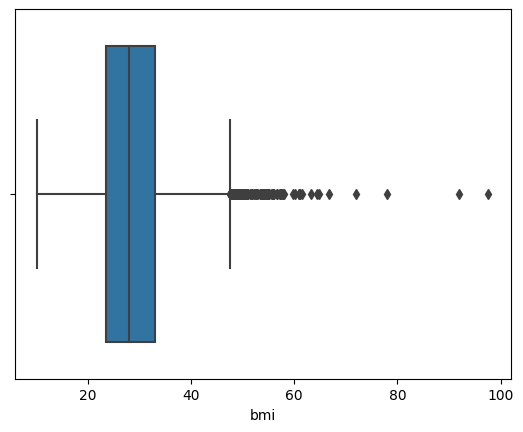

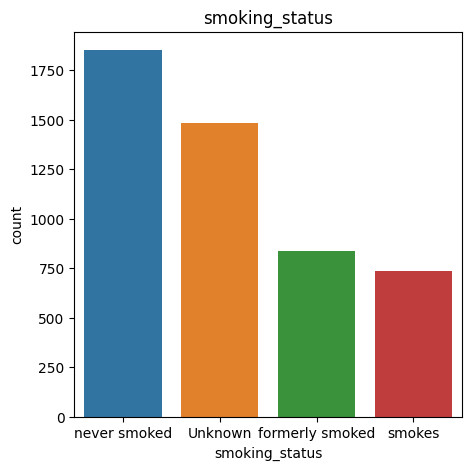

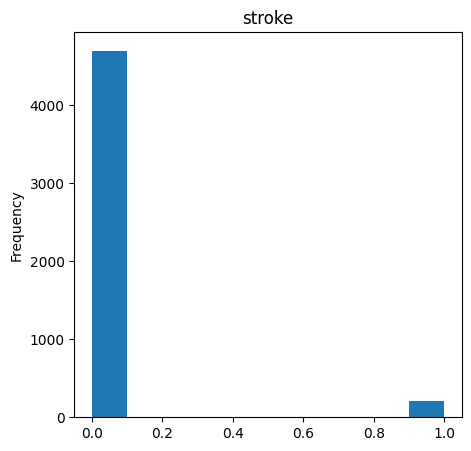

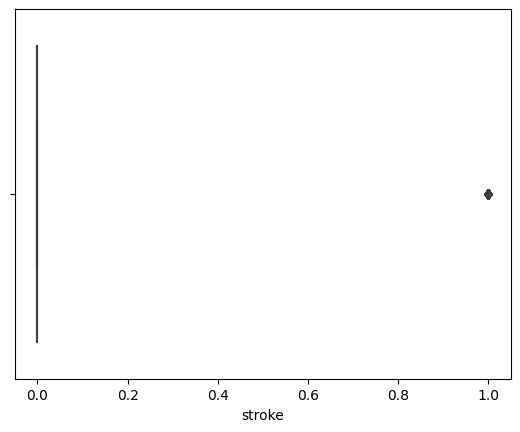

In [60]:
for col in data.columns:
    plt.figure(col, figsize=(5,5))
    plt.title(col)
    if is_numeric_dtype(data[col]):
        data[col].plot(kind="hist")
        plt.show()
        sns.boxplot(data=data, x=col)
        
        
    if is_string_dtype(data[col]):
        sns.countplot(x=col, data=data, order=data[col].value_counts().index)
        plt.show()

Observations:
- More Females than Males in the dataset
- Dataset slighlt sckewed toward Age 40+
- Very small number of patients had hypertension or heart disease
- There are 2x as many ever married patients than never married
- Majority of patients work in Private sector
- Evenly distributed between Urban and Rural
- Majority of patients had Avg glucose level 50-100
- Majority of patients have BMI between 20 and 40
- Relatively smaller share of patients either smoked in the past or current smokers

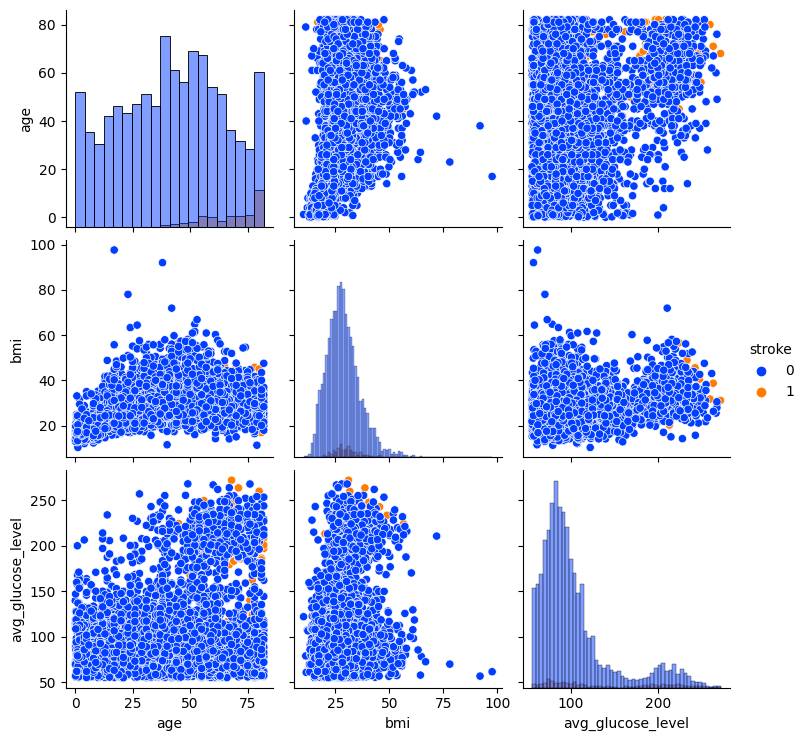

In [61]:
#Use Pairplot to identify the relationship between numerical-variables
sns.pairplot(data, vars=['age','bmi','avg_glucose_level'], diag_kind='hist', palette = "bright", hue='stroke')

No visible strong relationship between numerical variables

## Checking numerical variables against categorical

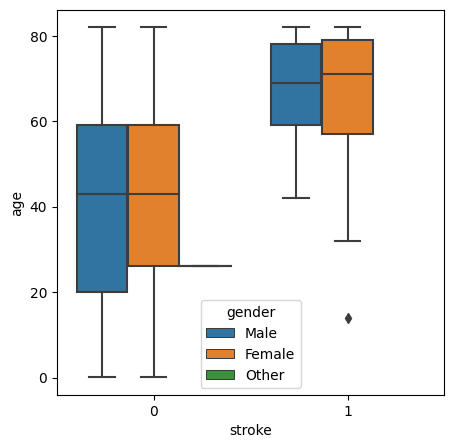

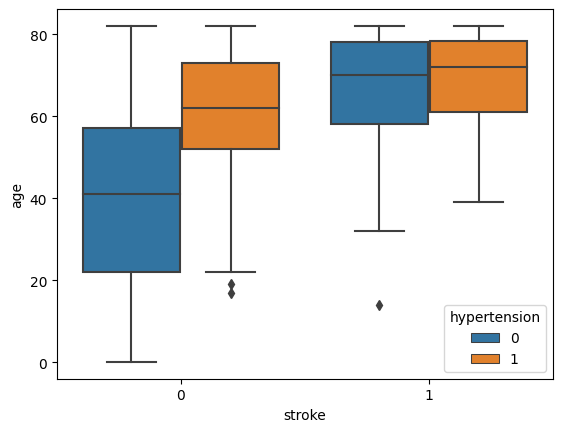

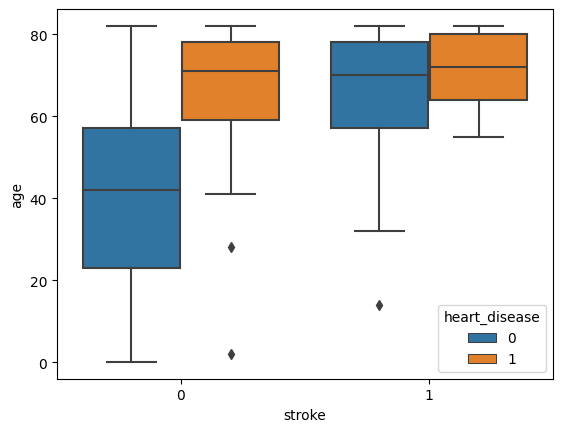

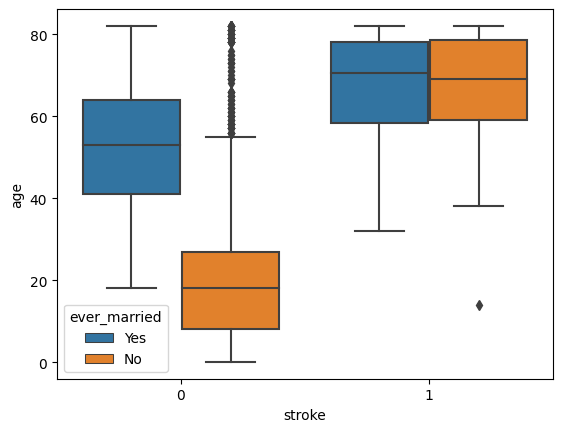

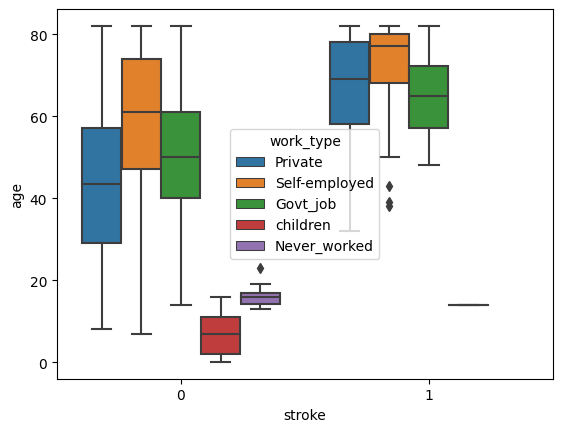

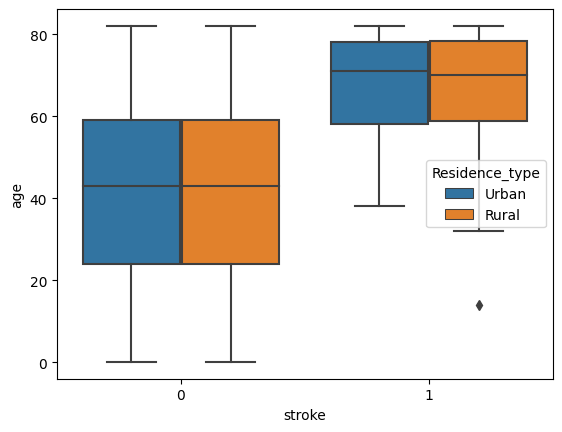

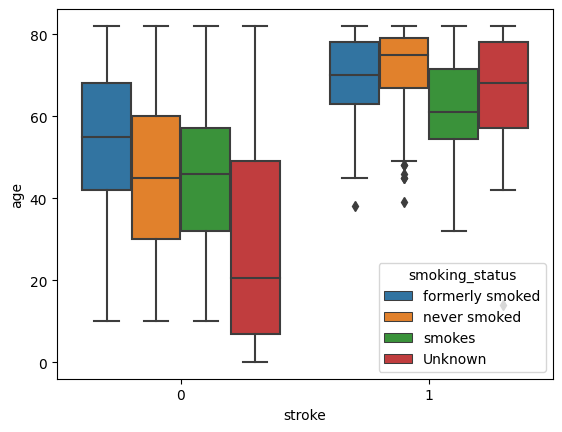

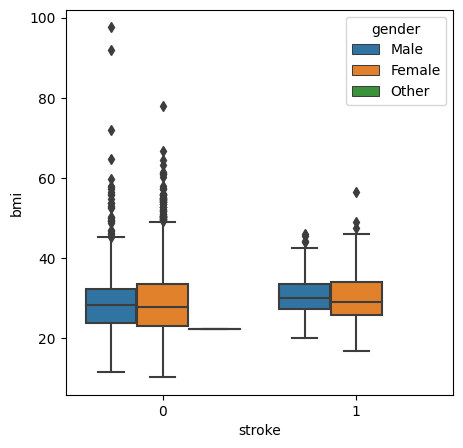

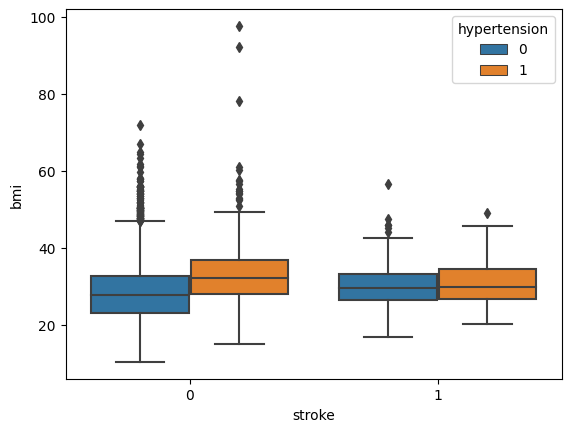

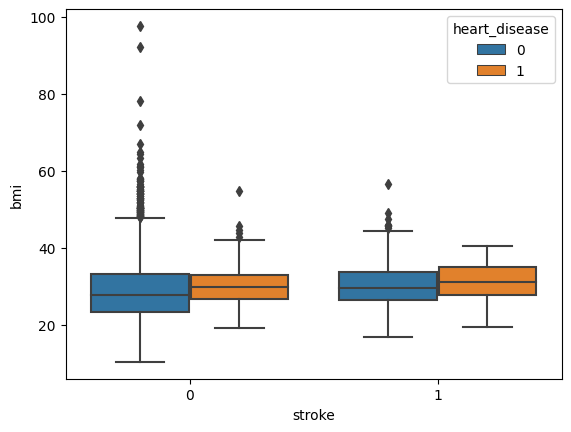

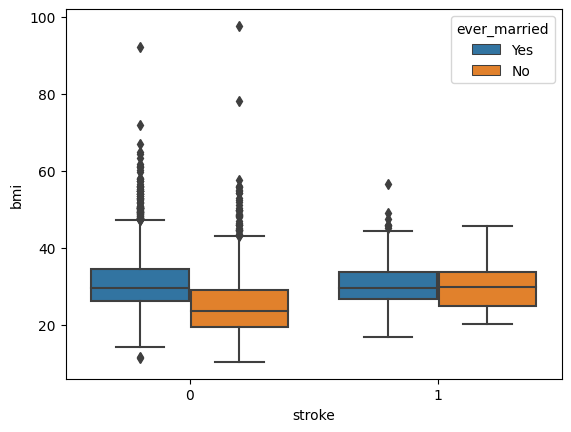

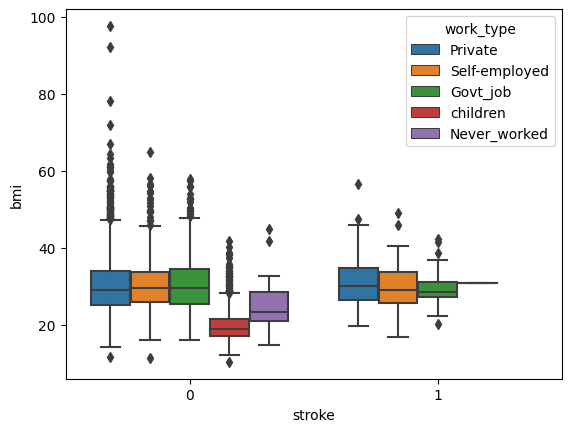

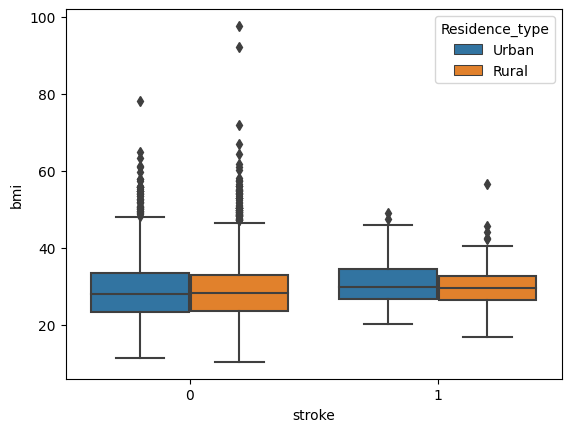

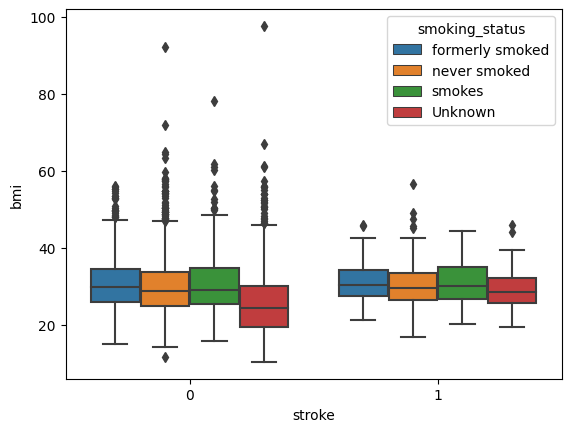

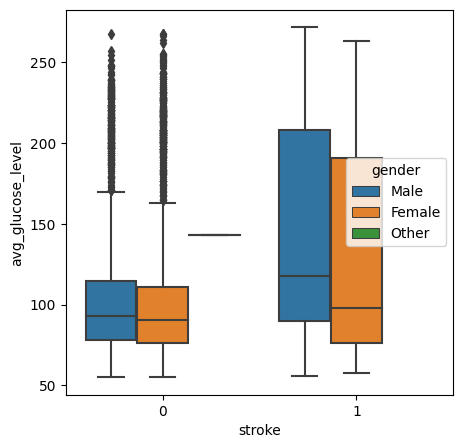

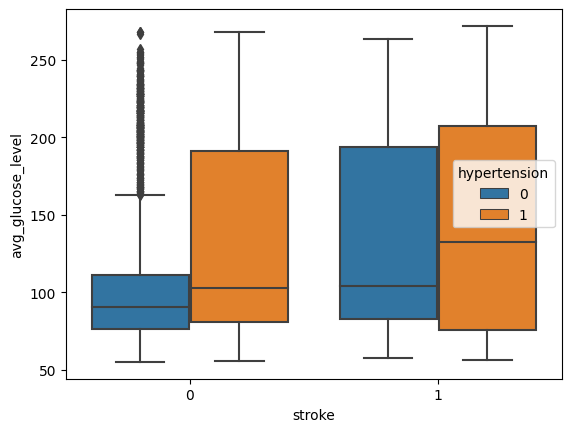

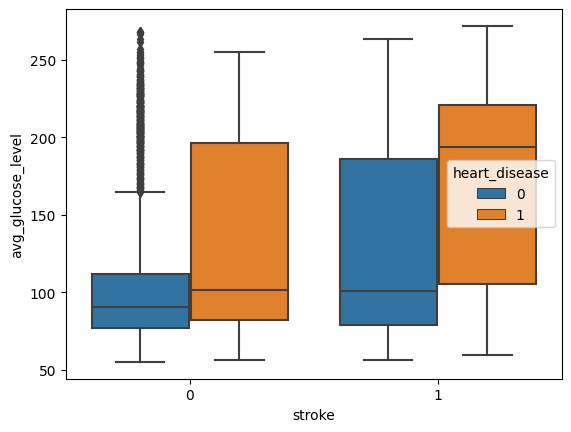

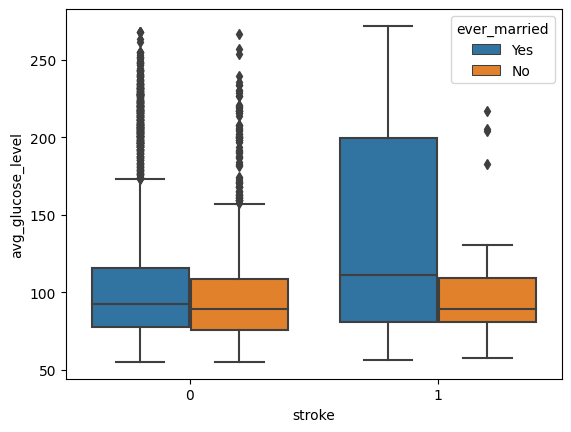

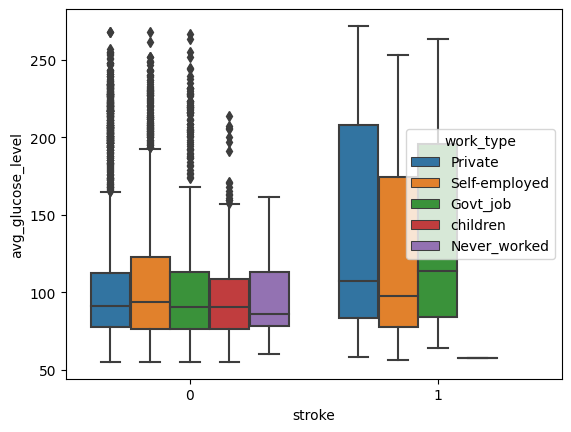

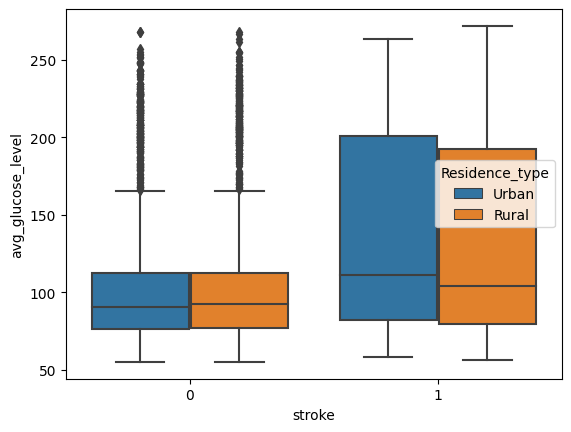

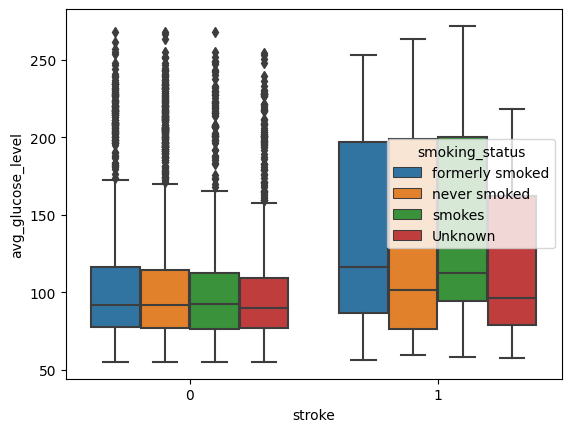

In [62]:
for ycolumns in ['age','bmi','avg_glucose_level']:
    plt.figure(ycolumns, figsize=(5,5))
    for hcolumns in ['gender','hypertension','heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
        sns.boxplot(data=data, x="stroke", y=ycolumns, hue=hcolumns)
        plt.show()

Observations
- Patients with stroke tend to be older and slightly higher Avg glucose level

## Encoding categorical variables

In [63]:
data_copy=data.copy()

for columns in ["gender","ever_married", "work_type", "Residence_type", "smoking_status"]:
    new_data=pd.get_dummies(data[columns], prefix=columns)
    data=pd.concat([data,new_data], axis=1)
    data.drop([columns], axis=1, inplace=True)

print(data.head())

    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   
5  81.0             0              0             186.21  29.0       1   

   gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0              0            1             0                0  ...   
2              0            1             0                0  ...   
3              1            0             0                0  ...   
4              1            0             0                0  ...   
5              0            1             0                0  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   


In [64]:
data.drop(["gender_Female", "gender_Other","ever_married_No","work_type_Never_worked","Residence_type_Rural", "smoking_status_Unknown"],axis=1, inplace=True)
print(data.head())

    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   
5  81.0             0              0             186.21  29.0       1   

   gender_Male  ever_married_Yes  work_type_Govt_job  work_type_Private  \
0            1                 1                   0                  1   
2            1                 1                   0                  1   
3            0                 1                   0                  1   
4            0                 1                   0                  0   
5            1                 1                   0                  1   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0            

## Correlation Matrix

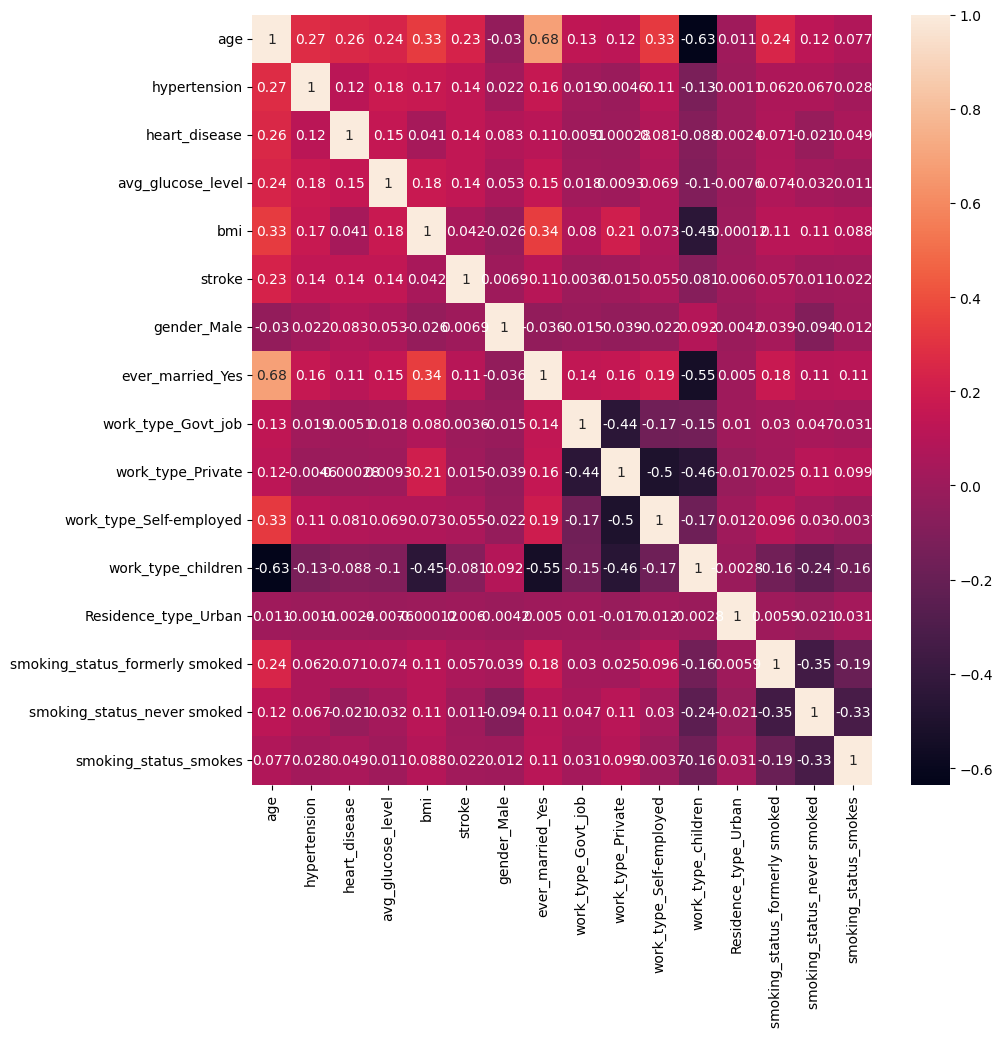

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

#### Assigning Target and Predictors to separate subsets

In [66]:
target = "stroke"
X = data.drop(columns=target)
y = data[target]

In [67]:
print(X)

       age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Male  \
0     67.0             0              1             228.69  36.6            1   
2     80.0             0              1             105.92  32.5            1   
3     49.0             0              0             171.23  34.4            0   
4     79.0             1              0             174.12  24.0            0   
5     81.0             0              0             186.21  29.0            1   
...    ...           ...            ...                ...   ...          ...   
5104  13.0             0              0             103.08  18.6            0   
5106  81.0             0              0             125.20  40.0            0   
5107  35.0             0              0              82.99  30.6            0   
5108  51.0             0              0             166.29  25.6            1   
5109  44.0             0              0              85.28  26.2            0   

      ever_married_Yes  wor

In [68]:
print(y)

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64


## Splitting the dataset into the Training set and Test set

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3927, 15)
y_train shape: (3927,)
X_test shape: (982, 15)
y_test shape: (982,)


In [70]:
print(X_test)

       age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Male  \
4336  80.0             0              1             125.32  32.9            1   
3709  42.0             0              0              84.03  31.4            0   
964   66.0             1              0              74.90  32.1            1   
2647  29.0             0              0             102.40  26.9            1   
3262  47.0             0              0              88.49  22.2            1   
...    ...           ...            ...                ...   ...          ...   
1022  22.0             0              0              58.38  36.0            1   
205   78.0             0              0             106.74  33.0            0   
3838  56.0             0              0             122.73  37.5            1   
5010  72.0             0              0              74.17  35.5            0   
1559  53.0             0              0              72.63  66.8            0   

      ever_married_Yes  wor

## Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
print(X_train)

[[ 1.58415472 -0.32198091 -0.23618875 ...  2.17751533 -0.76412186
  -0.42923306]
 [ 0.82970766 -0.32198091 -0.23618875 ... -0.45923902 -0.76412186
  -0.42923306]
 [-0.98984115 -0.32198091 -0.23618875 ... -0.45923902  1.30869178
  -0.42923306]
 ...
 [-1.87032526 -0.32198091 -0.23618875 ... -0.45923902 -0.76412186
  -0.42923306]
 [ 1.62853396 -0.32198091 -0.23618875 ...  2.17751533 -0.76412186
  -0.42923306]
 [ 0.11963983 -0.32198091 -0.23618875 ... -0.45923902 -0.76412186
   2.32973667]]


In [38]:
print(X_test)

[[-0.54604876 -0.32198091 -0.23618875 ... -0.45923902 -0.76412186
  -0.42923306]
 [-0.14663561 -0.32198091 -0.23618875 ... -0.45923902  1.30869178
  -0.42923306]
 [-1.56677126 -0.32198091 -0.23618875 ... -0.45923902 -0.76412186
  -0.42923306]
 ...
 [ 0.25277755  3.10577419 -0.23618875 ...  2.17751533 -0.76412186
  -0.42923306]
 [ 0.56343222 -0.32198091 -0.23618875 ... -0.45923902 -0.76412186
   2.32973667]
 [ 1.53977548  3.10577419  4.23390197 ... -0.45923902  1.30869178
  -0.42923306]]


## Decision Tree Classification model

In [107]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Predicting the Test set results

In [108]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

'Accuracy score = 0.93'

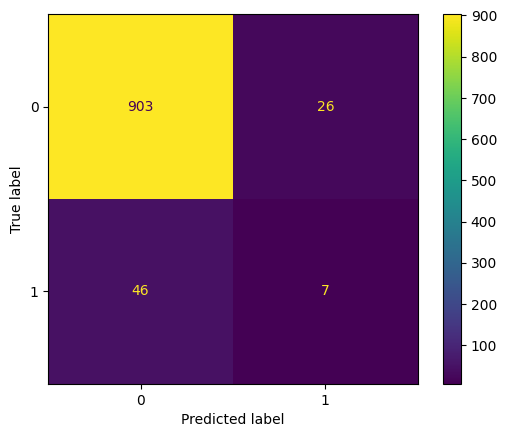

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test,y_test)
f'Accuracy score = {round(accuracy_score(y_test, y_pred),2)}'

It seems the model performs poorly in predicting churn - only 5 users were correctly predicted to churn and 9,743 who churned were predicted as "No churn"

In [76]:
depth = classifier.get_depth()
print(depth)

21


## Random Forest 

In [110]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [111]:
y_pred = classifier.predict(X_test)

'Accuracy score = 0.94'

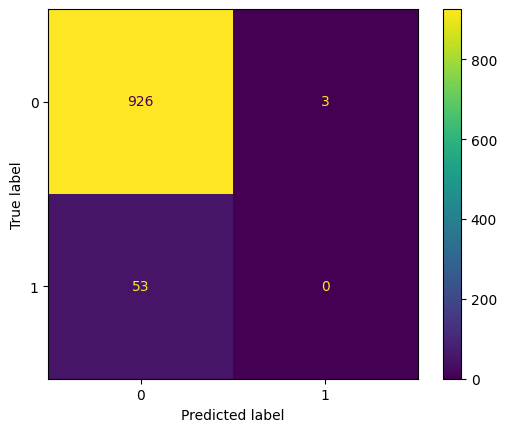

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test,y_test)
f'Accuracy score = {round(accuracy_score(y_test, y_pred),2)}'

## Naive Bayes

In [113]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [114]:
y_pred = classifier.predict(X_test)

'Accuracy score = 0.82'

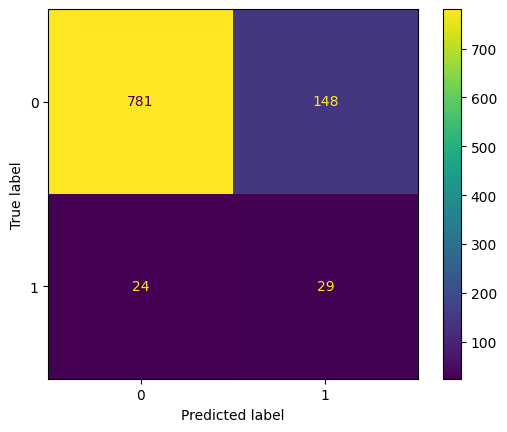

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test,y_test)
f'Accuracy score = {round(accuracy_score(y_test, y_pred),2)}'

## Support Vector Machine

In [116]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [117]:
y_pred = classifier.predict(X_test)

'Accuracy score = 0.95'

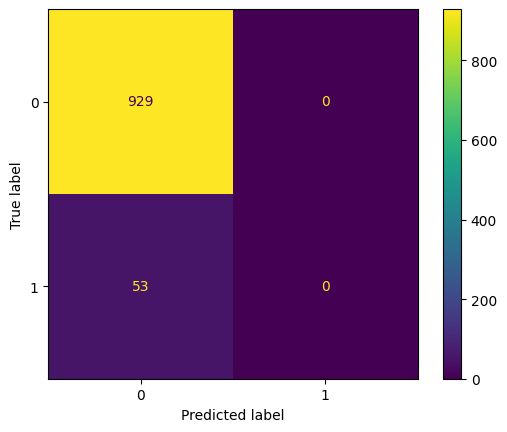

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test,y_test)
f'Accuracy score = {round(accuracy_score(y_test, y_pred),2)}'